In [2]:
import mysql.connector
import datetime
import pandas as pd

In [24]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

# Import consumption data

In [45]:
cnx = mysql.connector.connect(user='puser', password='sj5$mfD&k37z1c',
                              host='myencompass.supsi.ch',
                              database='encompass_model')
#set the cursor
cursor = cnx.cursor()


# Select the users

Given the user ids, retrieve the consumption.

In [6]:
# select only residential users
query = ("SELECT t1.oid FROM encompass_model.user t1 "+
"INNER JOIN encompass_model.dwelling t2 "+
"ON t2.oid = t1.dwelling_oid "+
"INNER JOIN encompass_model.building t3 "+
"ON t2.building_oid = t3.oid "+
"WHERE t3.building_type_oid != 4 and t3.building_type_oid != 5 ORDER BY t1.oid")
cursor.execute(query)
user_id =[x[0] for x in cursor.fetchall()] 

In [7]:
# remove test users
for x in range(154,159):
    user_id.remove(x)

#remove user 139 who has 0 in june and july as baseline
#remove user 140 who has 0 in june and july as baseline


#user_id.remove(139)
user_id.remove(140)
print(user_id)

[79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153]


In [8]:
#retrieve the usernames and user_id
userlist=[]
for id in user_id:    
    query = ("SELECT t3.username, t3.oid "+
            "FROM encompass_model.smart_meter t1 "+
            "INNER JOIN encompass_model.user t3 "+
            "ON t1.dwelling_oid = t3.dwelling_oid " +
            "AND t3.oid = %s" % id)  
    #print(query)
    print(id ,'.', end='')
    cursor.execute(query)
    rows = cursor.fetchall()
    #print(rows)
    userlist.append(rows[0])
    

79 .80 .81 .82 .83 .84 .85 .86 .87 .88 .89 .90 .91 .92 .93 .94 .95 .96 .97 .98 .99 .100 .101 .102 .103 .104 .105 .106 .107 .108 .109 .110 .111 .112 .113 .114 .115 .116 .117 .118 .119 .120 .121 .122 .123 .124 .125 .126 .127 .128 .129 .130 .131 .132 .133 .134 .135 .136 .137 .138 .139 .141 .142 .143 .144 .145 .146 .147 .148 .149 .150 .151 .152 .153 .

# Load the consumption

In [14]:
dataframe_list =[]

for id in user_id:

    #prepare the query
    query = ("SELECT t1.datetime, t1.consumption, t3.username, t1.smart_meter_oid "+
            "FROM encompass_model.meter_consumption t1 "+
            "INNER JOIN encompass_model.smart_meter t2 "+
            "ON t1.smart_meter_oid = t2.oid "+
            "INNER JOIN encompass_model.user t3 "+
            "ON t2.dwelling_oid = t3.dwelling_oid " +
            "AND t3.oid = %s" % id)
    print(id ,'.', end='')
    #print(query)

    #smart_meter_oid = 131
    #meter_start = datetime.date(2017, 11, 1)
    #meter_end = datetime.date(2018, 12, 2)

    #execute the query
    cursor.execute(query)

   
    # load the dataframe
    rows = cursor.fetchall()    

    df_cons = pd.DataFrame(rows)
    df_cons.columns = cursor.column_names
    df_cons=df_cons.drop(['username','smart_meter_oid'], axis=1)
    df_cons=df_cons.set_index('datetime')
    df_cons.index=pd.to_datetime(df_cons.index)
    
    dataframe_list.append(df_cons)



79 .80 .81 .82 .83 .84 .85 .86 .87 .88 .89 .90 .91 .92 .93 .94 .95 .96 .97 .98 .99 .100 .101 .102 .103 .104 .105 .106 .107 .108 .109 .110 .111 .112 .113 .114 .115 .116 .117 .118 .119 .120 .121 .122 .123 .124 .125 .126 .127 .128 .129 .130 .131 .132 .133 .134 .135 .136 .137 .138 .139 .141 .142 .143 .144 .145 .146 .147 .148 .149 .150 .151 .152 .153 .

In [15]:
dataf = pd.DataFrame({'user':userlist, 'cons':dataframe_list})

In [17]:


pickle.dump(dataf, open('cons_SES.pck','wb'))


# Load the baseline

In [18]:
basedf_list=[]

for id in user_id:

    #prepare the query
    query = ("SELECT month, total_consumption, smart_meter_oid "+
            "FROM encompass_model.baseline t1 "+
            "INNER JOIN encompass_model.smart_meter t2 "+
            "ON t1.smart_meter_oid = t2.oid "+
            "INNER JOIN encompass_model.user t3 "+
            "ON t2.dwelling_oid = t3.dwelling_oid " +
            "AND t3.oid = %s" % id)
    print(id , '.', end='')


    #smart_meter_oid = 131
    #meter_start = datetime.date(2017, 11, 1)
    #meter_end = datetime.date(2018, 12, 2)

    #execute the query
    cursor.execute(query)

    #for row in cursor:
    #    print(row)
    
    # load the dataframe
    df_base = pd.DataFrame(cursor.fetchall())
    df_base.columns = cursor.column_names
    #df.keys()
    df_base=df_base.set_index('month')
    df_base.index=pd.to_datetime(df_base.index)
    df_base=df_base.drop(['smart_meter_oid'], axis=1)
    
    basedf_list.append(df_base)

    # set the index
    #df_cons.columns = cursor.column_names
    #df.keys()
    #df_cons=df_cons.set_index('datetime')

    



79 .80 .81 .82 .83 .84 .85 .86 .87 .88 .89 .90 .91 .92 .93 .94 .95 .96 .97 .98 .99 .100 .101 .102 .103 .104 .105 .106 .107 .108 .109 .110 .111 .112 .113 .114 .115 .116 .117 .118 .119 .120 .121 .122 .123 .124 .125 .126 .127 .128 .129 .130 .131 .132 .133 .134 .135 .136 .137 .138 .139 .141 .142 .143 .144 .145 .146 .147 .148 .149 .150 .151 .152 .153 .

In [19]:
basedf = pd.DataFrame(({'user':userlist, 'cons':basedf_list}))

In [20]:
basedf['cons'][0].head()

,total_consumption
month,
2017-05-31,456.481
2017-06-30,227.124
2017-07-31,309.771
2017-08-31,346.875
2017-09-30,472.308


In [21]:
pickle.dump(basedf, open('base_SES.pck','wb'))


In [22]:
# Close the DB connection
cursor.close()
cnx.close()

# Import activity data

In [46]:
cnx = mysql.connector.connect(user='puser', password='sj5$mfD&k37z1c',
                              host='myencompass.supsi.ch',
                              database='gamification')
#set the cursor
cursor = cnx.cursor()

In [47]:
query = ("SELECT t1.user_id, t1.username, t2.oid FROM gamification.user t1 "+
"INNER JOIN encompass_model.user t2 "+
"ON t1.username = t2.username "+
"WHERE t1.groupoid=3")
cursor.execute(query)
userlist = cursor.fetchall()



In [51]:
#remove test users
userlist=userlist[0:len(userlist)-5]
#remove user 140
userlist.remove((313, 'ln.gggtt', 140))

In [52]:
len(userlist)

60

## Import weekly logins per user

In [54]:
logindf_list=[]
to_remove=[]

for id in userlist:
    query2=("SELECT a.community_user_user_id,   week(a.timestamp,1), "+
        "DATE_SUB(a.timestamp, INTERVAL WEEKDAY(a.timestamp) DAY) AS week, count(*) "+
        "FROM usage_logger a, user b WHERE a.community_user_user_id = %s " % id[0])
    query2 = query2 +"AND a.event='login' GROUP BY week(a.timestamp,1)" 
    # print(query2)
    print(id[0], ".", end=" ")
    cursor.execute(query2)
    rows = cursor.fetchall()
    if (len(rows)>0):
        # print(id[1], id[2])
        # print(id)
        logindf = pd.DataFrame(rows)
        logindf.columns = cursor.column_names
        #df.keys()
        logindf=logindf.set_index('week')
        logindf.index=pd.to_datetime(logindf.index)
        logindf=logindf.drop(['community_user_user_id', 'week(a.timestamp,1)'], axis=1)
        logindf.columns=['logins']
        logindf=logindf.resample('W').sum()
        #df_base=df_base.drop(['smart_meter_oid'], axis=1)
        logindf_list.append(logindf)
    else:
        # note the id to remove from userlist
         #   print('REMOVE',id)
        to_remove.append(id) #  userlist.remove(id)
        
        


252 . 253 . 254 . 255 . 256 . 257 . 258 . 259 . 260 . 261 . 262 . 263 . 264 . 265 . 266 . 267 . 268 . 269 . 270 . 271 . 272 . 273 . 274 . 275 . 276 . 277 . 278 . 279 . 280 . 282 . 285 . 286 . 287 . 288 . 289 . 290 . 291 . 292 . 294 . 295 . 297 . 298 . 299 . 300 . 302 . 303 . 304 . 305 . 306 . 307 . 310 . 311 . 314 . 315 . 316 . 317 . 318 . 319 . 320 . 321 . 

In [55]:
for elem in to_remove: 
    userlist.remove(elem)

In [56]:
len(userlist)

58

In [57]:
logindf = pd.DataFrame(({'user':userlist, 'logins':logindf_list}))

In [58]:
logindf['logins'][0].head()

,logins
week,
2018-06-10,1552
2018-06-17,873
2018-06-24,2134
2018-07-01,2328
2018-07-08,970


### Store logins

In [59]:
pickle.dump(logindf, open('logins_SES.pck','wb'))

## Import weekly activity per user 

In [60]:
activitydf_list=[]

for id in userlist:
    print(id[1], id[2], end=" ")
    query3=("SELECT b.user_id,  week(a.date,1),  DATE_SUB(a.date, INTERVAL WEEKDAY(a.date) DAY) "+
            "AS week, count(*) from action_instance a, user b WHERE a.rank_oid=b.user_id and b.user_id= %s " % id[0])
    query3 = query3 +" GROUP BY week(a.date,1)" 
    #print(query3)
    cursor.execute(query3)
    
    # alternative, read a row at a time, and then, if the week is missing, insert it
    
    activitydf = pd.DataFrame(cursor.fetchall())
    #don't import column names, else problems later
    activitydf.columns = cursor.column_names
    #df.keys()
    activitydf=activitydf.set_index('week') #corresponds to 'week'
    activitydf.index=pd.to_datetime(activitydf.index)
    activitydf=activitydf.drop(['user_id', 'week(a.date,1)'], axis=1)
    activitydf.columns=['activity']
    activitydf=activitydf.resample('W').sum()
    
    activitydf_list.append(activitydf)



fbf 79 pcc 80 mtt.mrcll 81 nvmn 82 Dnl.pcc 83 fd.952 84 cnz.ln.85 85 tnn.pdl 86 t.pngll 87 mmn 88 sndrsssll 89 dnl.crrtt 91 flv.frnch 92 jnny.cndlf 93 jkvvnkvc 94 slvln 95 nppzz 96 mm.frrll 97 jr61150 98 stfn.mn 99 crstn.cmzzl 100 Snj84 101 gmfrss 102 Mrk.cr 103 nf4 104 Jl9 105 rbrt.mr 106 .BRCSLS 107 mp8569 109 d.grbn 112 mvjn 113 dnlklbrt.v 114 mr.r 115 hppy111 116 ndr.brff 117 rlf.ps 118 nt4565 119 nn.gggtt 121 7ccc 122 ndbs 124 lxrx 125 lcfvn 126 pml.brn 127 vsf.ydn 129 cld-cry 130 vlr.slv 131 m.tn 132 rspst 133 dvd.tgn 134 ptr.dc1965 137 srh.pdrn 138 gr.rlln 142 rrmt 143 hlrsk 144 mrtrs.ghsltt 145 vt.sbr 146 ndrkgrdn 147 sndr.prt 148 

In [61]:
len(activitydf_list)

58

In [62]:
activitydf = pd.DataFrame(({'user':userlist, 'activity':activitydf_list}))

In [63]:
activitydf['activity'][8].head()

,activity
week,
2018-06-10,24
2018-06-17,0
2018-06-24,1
2018-07-01,1
2018-07-08,1


### Store activity

In [64]:
pickle.dump(activitydf, open('activity_SES.pck','wb'))

In [38]:
# Close the DB connection


# Import sensor data 

## Import the temperature

In [39]:
#SELECT t1.datetime, t1.value, t3.username FROM encompass_model.indoor_conditions_temperature t1 
#INNER JOIN encompass_model.smart_meter t2 
#ON t1.dwelling_room_oid = t2.dwelling_oid 
#INNER JOIN encompass_model.user t3 
#ON t2.dwelling_oid = t3.dwelling_oid
#AND t3.oid = 133

In [ ]:
temperature_df_list =[]

for id in user_id:

    date='2018-6-1'
    #prepare the query
    query = ("SELECT u.oid AS user_oid, u.username AS username, "+
             "d.oid AS dwelling_oid, dr.oid AS room_id, ich.datetime AS datetime "+
             "FROM encompass_model.indoor_conditions_temperature AS ich, "+
             "dwelling_room AS dr, dwelling AS d, user AS u "+
             "WHERE dr.dwelling_oid = d.oid AND u.dwelling_oid = d.oid AND ich.dwelling_room_oid = dr.oid "+
             "AND datetime >= %s "+
             "AND  u.oid = %s" % date, id)
    print(id ,'.', end='')
    #print(query)

    #smart_meter_oid = 131
    #meter_start = datetime.date(2017, 11, 1)
    #meter_end = datetime.date(2018, 12, 2)

    #execute the query
    cursor.execute(query)

   
    # load the dataframe
    rows = cursor.fetchall()    

    df_temp = pd.DataFrame(rows)
    df_temp.columns = cursor.column_names
    df_temp=df_temp.drop(['username'], axis=1)
    df_temp=df_temp.set_index('datetime')
    df_temp.index=pd.to_datetime(df_temp.index)
    
    temperature_df_list.append(df_temp)




In [ ]:
tempdf['value'][0].head()

In [ ]:
cursor.close()
cnx.close()

# Import user profile data

In [27]:
cnx = mysql.connector.connect(user='puser', password='sj5$mfD&k37z1c',
                              host='myencompass.supsi.ch',
                              database='encompass_model')
#set the cursor
cursor = cnx.cursor()

In [28]:
query = ("SELECT * "+
            "FROM encompass_model.user_profile")
cursor.execute(query)
rows = cursor.fetchall()    
df_profile = pd.DataFrame(rows)
df_profile.columns = cursor.column_names
df_profile=df_profile.drop(['oid'], axis=1)
df_profile=df_profile.set_index('user_oid')

In [29]:
df_profile.head()

,no_of_adults_older_than_16,no_of_kids_younger_than_16,no_of_pets,living_since_may_2017,dwelling_type_oid,number_of_rooms,heating_type_oid,heating_source_type_oid,heat_pump,water_boiler,...,desktop_computer,laptop_computer,gaming_set,energy_saving_motivation,occupancy_during_day_weekdays,occupancy_during_night_weekdays,occupancy_during_day_weekend,occupancy_during_night_weekend,desired_thermal_comfort,desired_visual_comfort
user_oid,,,,,,,,,,,,,,,,,,,,,
79,3,1,4,1,0,5,0,0,0,0,...,0,1,1,None,0.0,1.0,1.0,0.0,3.0,None
80,2,0,1,1,0,5,1,1,1,0,...,1,1,0,None,1.0,1.0,1.0,1.0,0.0,None
81,2,2,0,1,0,5,1,2,0,1,...,1,1,1,None,1.0,1.0,1.0,1.0,0.0,None
82,2,1,0,1,0,5,1,1,1,1,...,0,1,0,None,1.0,1.0,1.0,1.0,-1.0,None
83,2,0,2,1,1,3,1,0,0,1,...,1,1,1,None,1.0,1.0,1.0,1.0,0.0,None


In [30]:
pickle.dump(df_profile, open('profiles_SES.pck','wb'))

In [31]:
cursor.close()
cnx.close()

# Some stuff to be ignored from here on

In [107]:
tempdf=activitydf['activity'][0]
tempdf.head()

,activity
week,
2018-06-10,76
2018-06-17,10
2018-06-24,19
2018-07-01,77
2018-07-08,16


In [119]:
tempdf.index[lung-1]

Timestamp('2018-11-11 00:00:00', freq='W-SUN')

In [ ]:
for i in range(len(activitydf['user'])):
    tempdf=activitydf['activity'][i]
    lung = len(tempdf)
    print(i, lung, tempdf.index[0], tempdf.index[lung-1])

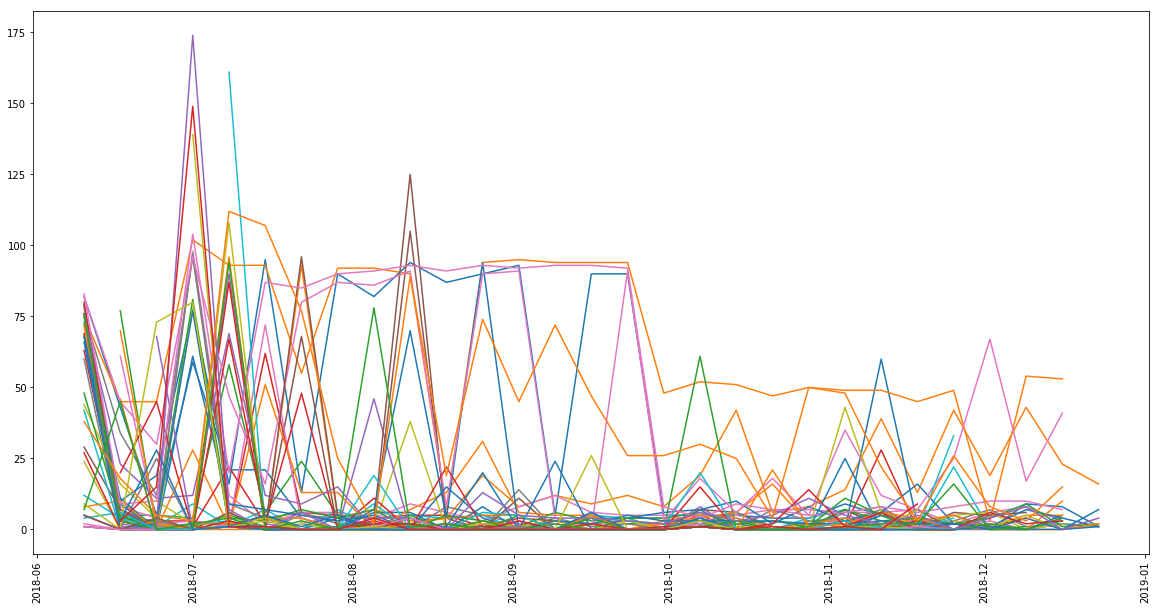

In [86]:
fig=plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
for i in range(len(activitydf['user'])):
    plt.plot(activitydf['activity'][i])
    

In [121]:
for i in range(len(logindf['user'])):
    tempdf=logindf['logins'][i]
    lung = len(tempdf)
    print(i, lung, tempdf.index[0], tempdf.index[lung-1])

0 29 2018-06-10 00:00:00 2018-12-23 00:00:00
1 29 2018-06-10 00:00:00 2018-12-23 00:00:00
2 29 2018-06-10 00:00:00 2018-12-23 00:00:00
3 27 2018-06-10 00:00:00 2018-12-09 00:00:00
4 23 2018-06-10 00:00:00 2018-11-11 00:00:00
5 1 2018-06-10 00:00:00 2018-06-10 00:00:00
6 28 2018-06-10 00:00:00 2018-12-16 00:00:00
7 28 2018-06-10 00:00:00 2018-12-16 00:00:00
8 25 2018-06-10 00:00:00 2018-11-25 00:00:00
9 28 2018-06-10 00:00:00 2018-12-16 00:00:00
10 28 2018-06-10 00:00:00 2018-12-16 00:00:00
11 28 2018-06-10 00:00:00 2018-12-16 00:00:00
12 25 2018-06-17 00:00:00 2018-12-02 00:00:00
13 25 2018-06-10 00:00:00 2018-11-25 00:00:00
14 26 2018-06-10 00:00:00 2018-12-02 00:00:00
15 21 2018-07-22 00:00:00 2018-12-09 00:00:00
16 27 2018-06-17 00:00:00 2018-12-16 00:00:00
17 25 2018-06-10 00:00:00 2018-11-25 00:00:00
18 1 2018-07-01 00:00:00 2018-07-01 00:00:00
19 17 2018-06-17 00:00:00 2018-10-07 00:00:00
20 22 2018-06-10 00:00:00 2018-11-04 00:00:00
21 28 2018-06-17 00:00:00 2018-12-23 00:00:00


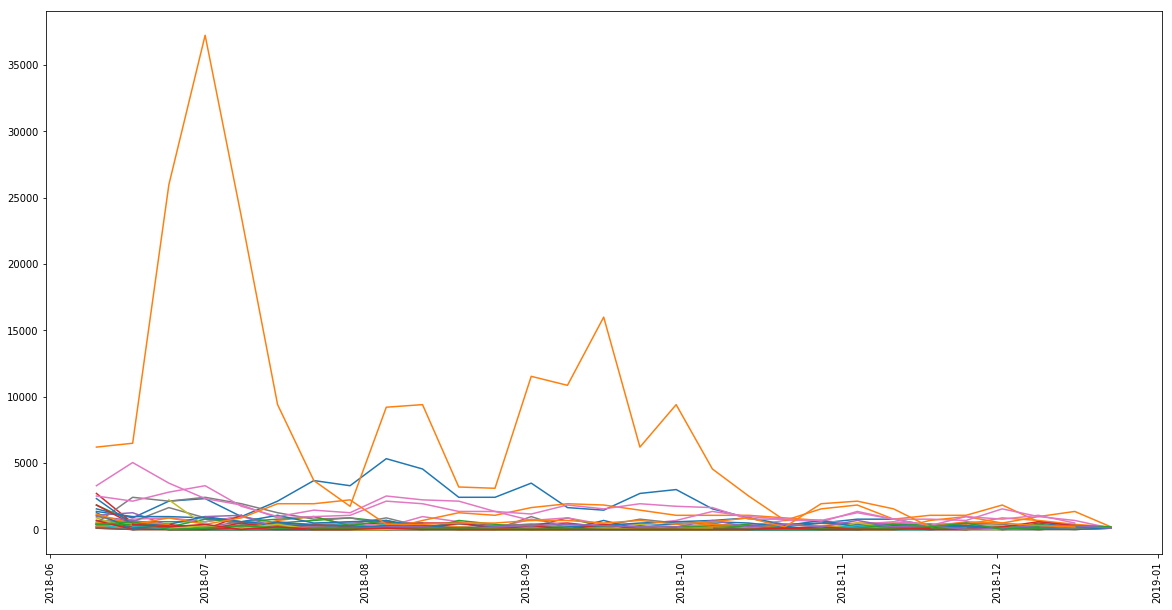

In [87]:
fig=plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
for i in range(len(logindf['user'])):
    plt.plot(logindf['logins'][i])